 # Análisis Exploratorio de Datos (EDA) sobre Salarios en el campo Data Science


## Introducción

Realización de un analisis exploratorio de datos sobre salarios dentro del mundo de los datos.
Se van realizar utilizando el lenguaje de programación Python y diferentes librerías como numpy, pandas y matplotlib, entre otras. 
Los datos provienen de la plataforma Kaggle, e incluyen información relevante para el estudio que llevaremos a cabo.

## Objetivo

Conocer la distribución de salarios en el campo del data para toma de decisiones futuras

## Hipótesis

1. ¿Qué relación existe entre el salario y el nivel de estudios de forma general? SALARY DATA
2. ¿Qué relación existe entre el salario y el nivel de estudios dentro del campo de Data? SALARY DATA
3. ¿Cuál es la diferencia de media de salarios entre los salarios relacionados con el data y lo de otros grupos de trabajo? Ej.: área de marketing, financiero y ventas. SALARY DATA
4. ¿Qué relación tiene el  nivel de experiencia y el salario? DS_SALARY
5. ¿Qué relación tiene los años de experiencia y el salario? SALARY DATA
6. ¿Dentro del campo de data, hay diferencias entre la cantidad de hombres y mujeres? SALARY DATA
7. ¿Dentro del campo de data, hay diferencias entre los salarios de hombre y mujeres? SALARY DATA
8. Dentro del campo de data, qué trabajo tiene mayor ratio de trabajo remoto? DS_SALARY
9. Dentro del campo de data, ¿quién tiene mayor salario de entrada? AMBOS
10. Dentro del campo de data, cuál es la media de edad de los trabajadores Junior? Hay diferencia entre la media de edad entre hombres y mujeres junior?

## Librerías

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import squarify
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import random
import missingno as msno

import warnings

warnings.filterwarnings('ignore')



## Carga de Datos

In [283]:
df = pd.read_csv(r'C:/Users/laura/Desktop/SALARY_ANALYSIS/data/ds_salaries.csv', sep = ',')

In [284]:
df2 = pd.read_csv(r'C:/Users/laura/Desktop/SALARY_ANALYSIS/data/Salary_Data.csv', sep = ',')

### Desripción de columnas de dataframe

***Columnas del data frame ds_salaries***


| Columnas | Descripción |
|----------|----------|
|work_year|año en el que se tomaron los datos del salario.
|experience_level|Nivel de experiencia del trabajador en el año de la consulta.
|employment_type|Tipo de contrato según la duración del mismo.
|job_title|Nombre del puesto de trabajo que desempeña el usuario.
|salary| Salario anual.
|salary_currency| Moneda en la que se recibe el salario.
|salary_in_usd| Salario convertido a us$.
|employee_residence|País de residencia del empleado.
|remote_ratio|Porcentaje de trabajo en remoto del empleado.
|company_location|País de residencia de la c ompañía.
|company_size|Tamaño de la compañía.


***Columnas del data frame Salary_Data***


| Columnas | Descripción |
|----------|----------|
|Age|Edad del usuario.
|Gender| Género del usuario.
|Education_level|Nivel máximo de estudios finalizados por el usuario.
|Job Title| Nombre del puesto de trabajo que desempeña el usuario.
|Years of Experience| Años de experiencia en el puesto de trabajo.
|Salary| Salario anual.


## Primera exploración

### ds_salaries ###

In [285]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [286]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [288]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [289]:
df.size

41305

In [290]:
df.shape

(3755, 11)

In [291]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [292]:
df.describe(include=int).round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [293]:
df.describe(include=object).round(2)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [294]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

**Cardinalidad**

In [295]:
cardinalidades = pd.DataFrame(columns=['cardinalidad','porcentaje_cardinalidad','tipo_de_dato','valores_unicos'],  index=df.columns)


In [296]:
cardinalidades['cardinalidad']= [df[col].nunique() for col in df.columns]
cardinalidades['porcentaje_cardinalidad'] = (cardinalidades['cardinalidad']/len(df)*100).round(2)
cardinalidades['tipo_de_dato'] = df.dtypes
cardinalidades['valores_unicos'] = [df[col].unique() for col in df.columns]

In [297]:
cardinalidades

,cardinalidad,porcentaje_cardinalidad,tipo_de_dato,valores_unicos
work_year,4,0.11,int64,"[2023, 2022, 2020, 2021]"
experience_level,4,0.11,object,"[SE, MI, EN, EX]"
employment_type,4,0.11,object,"[FT, CT, FL, PT]"
job_title,93,2.48,object,"[Principal Data Scientist, ML Engineer, Data S..."
salary,815,21.70,int64,"[80000, 30000, 25500, 175000, 120000, 222200, ..."
salary_currency,20,0.53,object,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ..."
salary_in_usd,1035,27.56,int64,"[85847, 30000, 25500, 175000, 120000, 222200, ..."
employee_residence,78,2.08,object,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C..."
remote_ratio,3,0.08,int64,"[100, 0, 50]"
company_location,72,1.92,object,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F..."


In [298]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable experience_level es 0.11%
La cardinalidad de la variable employment_type es 0.11%
La cardinalidad de la variable job_title es 2.48%
La cardinalidad de la variable salary_currency es 0.53%
La cardinalidad de la variable employee_residence es 2.08%
La cardinalidad de la variable company_location es 1.92%
La cardinalidad de la variable company_size es 0.08%


In [299]:
for i in df.select_dtypes(exclude=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable work_year es 0.11%
La cardinalidad de la variable salary es 21.70%
La cardinalidad de la variable salary_in_usd es 27.56%
La cardinalidad de la variable remote_ratio es 0.08%


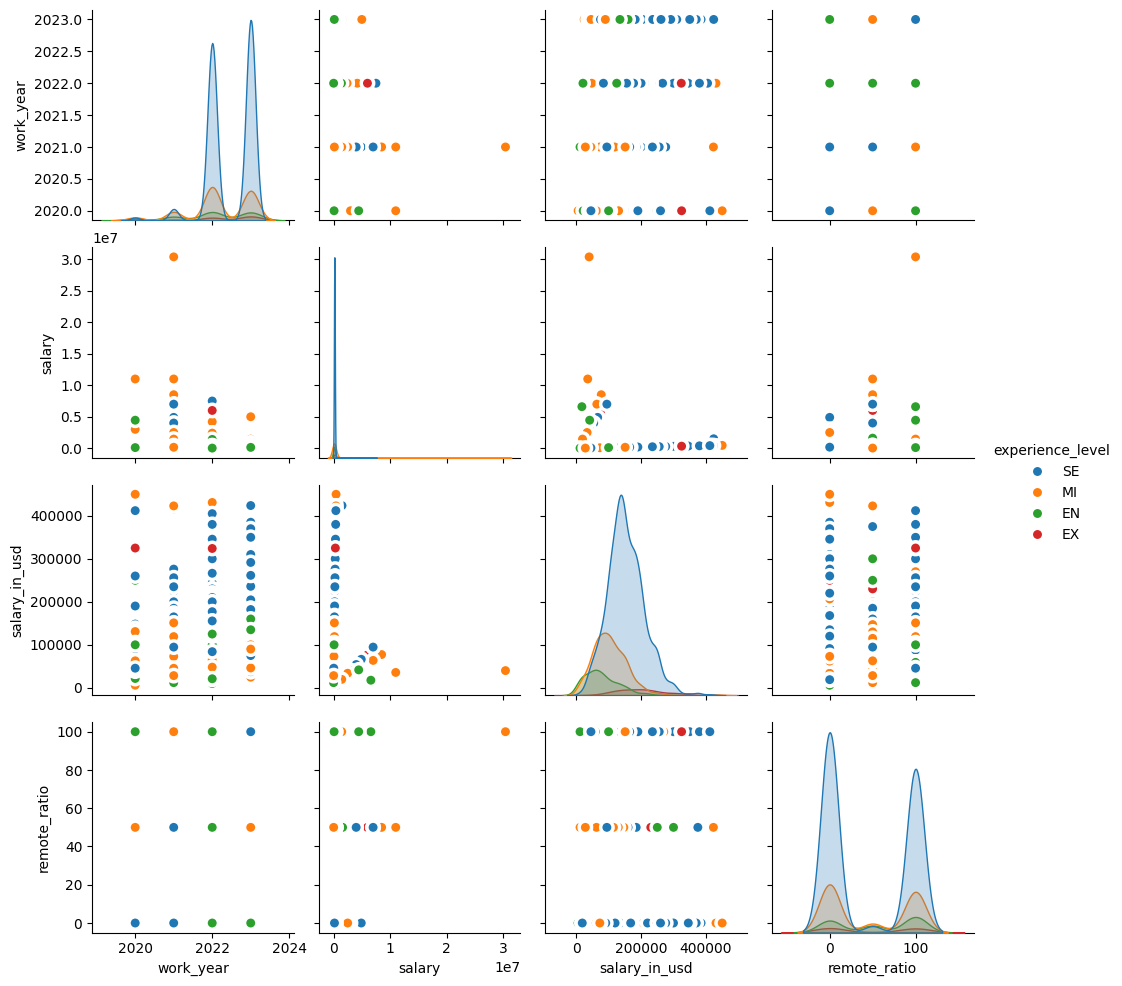

In [300]:
sns.pairplot(df, kind='scatter', hue='experience_level',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

### Salary_Data ###

In [301]:
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [302]:
df2.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [304]:
df2.size

40224

In [305]:
df2.shape

(6704, 6)

In [306]:
df2.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [307]:
df2.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [308]:
df2.isna().sum()/len(df)*100

Age                    0.053262
Gender                 0.053262
Education Level        0.079893
Job Title              0.053262
Years of Experience    0.079893
Salary                 0.133156
dtype: float64

In [309]:
df2.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [310]:
df2.describe(include=object).round(2)

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


**Cardinalidad**

In [311]:
cardinalidad2 = pd.DataFrame(columns=['cardinalidad','porcentaje_cardinalidad','tipo_de_dato','valores_unicos'],  index=df2.columns)


In [312]:
cardinalidad2['cardinalidad']= [df2[col].nunique() for col in df2.columns]
cardinalidad2['porcentaje_cardinalidad'] = (cardinalidad2['cardinalidad']/len(df2)*100).round(2)
cardinalidad2['tipo_de_dato'] = df2.dtypes
cardinalidad2['valores_unicos'] = [df2[col].unique() for col in df2.columns]

In [313]:
cardinalidad2

,cardinalidad,porcentaje_cardinalidad,tipo_de_dato,valores_unicos
Age,41,0.61,float64,"[32.0, 28.0, 45.0, 36.0, 52.0, 29.0, 42.0, 31...."
Gender,3,0.04,object,"[Male, Female, nan, Other]"
Education Level,7,0.10,object,"[Bachelor's, Master's, PhD, nan, Bachelor's De..."
Job Title,193,2.88,object,"[Software Engineer, Data Analyst, Senior Manag..."
Years of Experience,37,0.55,float64,"[5.0, 3.0, 15.0, 7.0, 20.0, 2.0, 12.0, 4.0, 1...."
Salary,444,6.62,float64,"[90000.0, 65000.0, 150000.0, 60000.0, 200000.0..."


## Limpieza

### ds_salaries ###

Eliminamos columnas para trabajar solo con los salarios en $

In [314]:
# df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
lo hacemos ?? 

SyntaxError: invalid syntax (2858715264.py, line 2)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### Salary_Data ###

Buscamos las filas con valores nulos para job title.

In [ ]:
rows_with_nan = df2[df2.isna().any(axis=1)]
rows_with_nan

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Las eliminamos ya que no  hay ningún tipo de dato en toda la fila.

In [ ]:
df2 = df2.dropna(axis=0, how='all')

In [ ]:
df2.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [ ]:
len(df2['Job Title'].unique())

193

In [ ]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [ ]:
developers = df2[df2['Job Title'].str.startswith('Developer')].sort_values(by='Job Title')
developers
# solo tenemos un 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [ ]:
df2['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

**Vamos a limpiar la columna Education level, filtrando por titulo conseguido**
Master's == 'Master's Degree'
Bachelor's == Bachelor's Degree

In [ ]:
df2['Education Level'].replace(to_replace="Bachelor's", value="Bachelor's Degree", inplace=True)

In [ ]:
df2['Education Level'].replace(to_replace="Master's", value="Master's Degree", inplace=True)

In [ ]:
df2['Education Level'].replace(to_replace="phD", value="PhD", inplace=True)

In [ ]:
df2['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', nan, 'High School'],
      dtype=object)

Inputación NaN en la columna Education Level.

In [ ]:
show =pd.DataFrame(df2.groupby([ 'Gender','Education Level'])['Education Level'].count())
show

Education Level
Gender Education Level                   
Female Bachelor's Degree             1199
       High School                    251
       Master's Degree               1068
       PhD                            496
Male   Bachelor's Degree             1824
       High School                    185
       Master's Degree                791
       PhD                            873
Other  High School                     12
       Master's Degree                  2

In [ ]:
show.unstack()

Education Level                                   
Education Level Bachelor's Degree High School Master's Degree    PhD
Gender                                                              
Female                     1199.0       251.0          1068.0  496.0
Male                       1824.0       185.0           791.0  873.0
Other                         NaN        12.0             2.0    NaN

imputamos la moda de education level para los hombres 

In [ ]:
df2['Education Level'].fillna(value="Bachelor's Degree", inplace=True)

In [ ]:
df2['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

In [ ]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Imputación NaN en la columna Salary:

***Para Full Stack Engineer***

In [ ]:
df_full = df2[df2['Job Title'].str.contains('Full Stack Engineer', case = False)]
df_full

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1205,27.0,Female,Master's Degree,Full Stack Engineer,3.0,100000.0
1208,47.0,Female,PhD,Full Stack Engineer,12.0,175000.0
1218,32.0,Male,Bachelor's Degree,Full Stack Engineer,5.0,115000.0
1222,42.0,Male,PhD,Full Stack Engineer,14.0,180000.0
1229,36.0,Female,Master's Degree,Full Stack Engineer,8.0,140000.0
...,...,...,...,...,...,...
3121,31.0,Female,Master's Degree,Full Stack Engineer,7.0,108799.0
3125,28.0,Female,Master's Degree,Full Stack Engineer,4.0,82697.0
3128,43.0,Male,Bachelor's Degree,Full Stack Engineer,18.0,152560.0
3133,29.0,Female,Bachelor's Degree,Full Stack Engineer,6.0,100358.0


In [ ]:
df_full = df_full[df_full['Education Level']=="Master's Degree"]

In [ ]:
df_full.groupby('Gender')['Salary'].mean()

Gender
Female    125574.096774
Male      131669.444444
Other     161393.000000
Name: Salary, dtype: float64

In [322]:
# df2.iloc[3136,-1].fillna(value=125574.096774, inplace=True)
# df2.loc[3136,['Salary']] = df2['Salary'].replace(to_replace="NaN", value="125574.096774", inplace=True)
df2.loc[3136, ['Salary']].fillna(value=125574.096774, inplace=True) 

In [323]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [324]:
df2[df2.isna().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


***Para Social M***

***Para Sales Director***

Creación de un Data Frame menor únicamente con datos sobre empleos relacionados con Data.

In [ ]:
df_data = df2[df2['Job Title'].str.contains('Data', case=False)].sort_values(by='Job Title')

In [ ]:
df_data['Job Title'].unique()

array(['Chief Data Officer', 'Data Analyst', 'Data Entry Clerk',
       'Data Scientist', 'Director of Data Science',
       'Junior Data Analyst', 'Junior Data Scientist',
       'Senior Data Analyst', 'Senior Data Engineer',
       'Senior Data Scientist'], dtype=object)

In [ ]:
df_data.shape

(969, 6)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 105 to 4836
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  969 non-null    float64
 1   Gender               969 non-null    object 
 2   Education Level      969 non-null    object 
 3   Job Title            969 non-null    object 
 4   Years of Experience  969 non-null    float64
 5   Salary               969 non-null    float64
dtypes: float64(3), object(3)
memory usage: 53.0+ KB


In [ ]:
df_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's,Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's,Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's,Data Analyst,3.0,120000.0


In [ ]:
df_data.describe(include=object).round(2)

,Gender,Education Level,Job Title
count,969,969,969
unique,2,3,8
top,Male,PhD,Senior Data Scientist
freq,604,432,485


In [ ]:
df_data.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,969.00,969.00,969.00
mean,33.65,9.00,148816.31
std,7.34,5.76,39938.55
min,23.00,0.00,35000.00
25%,28.00,5.00,120000.00
50%,31.00,8.00,150000.00
75%,41.00,13.00,180000.00
max,51.00,24.00,240000.00


In [ ]:
df_data['Job Title'].value_counts()


Job Title
Senior Data Scientist       485
Junior Data Analyst         245
Senior Data Analyst         146
Director of Data Science     57
Junior Data Scientist        30
Senior Data Engineer          4
Chief Data Officer            1
Data Entry Clerk              1
Name: count, dtype: int64

**Vamos a reducir el numero de job titles filtrando por años de experiencia**
consideramos senior a partir de 5 años

In [ ]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Scientist'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Scientist'

In [ ]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Analyst'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Analyst'


In [ ]:
df_data[df_data['Job Title'].str.contains('Clerk', case=False)]
# df_data.drop(df['Job Title'].str.contains('Clerk', case=False))

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
18,25.0,Female,Bachelor's Degree,Data Entry Clerk,0.0,35000.0


**También lo hacemos con el Education level, filtrando por titulo conseguido**
Master's == 'Master's Degree'
Bachelor's == Bachelor's Degree

In [ ]:
df_data['Education Level'].unique()

array(['PhD', "Master's Degree", "Bachelor's Degree"], dtype=object)

In [ ]:
df_data['Education Level'].replace(to_replace="Master's", value="Master's Degree", inplace=True)

In [ ]:
df_data['Education Level'].replace(to_replace="Bachelor's", value="Bachelor's Degree", inplace=True)

In [ ]:
df_data


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


## HIPóTESIS 1: ##

¿Qué relación existe entre el salario y el nivel de estudios de forma general? SALARY DATA

## HIPOTESIS 2: ##
¿Qué relación existe entre el salario y el nivel de estudios dentro del campo de Data?
Relacion entre nivel educativo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\4125025634.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x = 'Education Level', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))


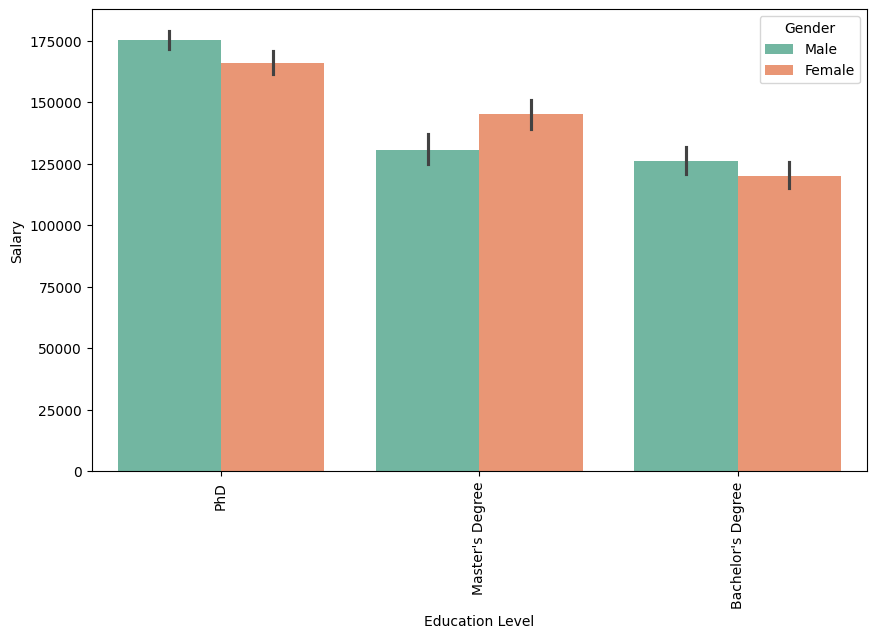

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Education Level', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

## HIPOTESIS 3: ##
¿Cuál es la diferencia de media de salarios entre los salarios relacionados con el data y lo de otros grupos de trabajo? Ej.: área de marketing, financiero y ventas.

## HIPOTESIS 4: ##
¿Qué relación tiene el  nivel de experiencia y el salario? 

## HIPOTESIS 5: ##
¿Qué relación tiene los años de experiencia y el salario?
Relacion entre años de experiencia y salario.
Hipotesis nula, a mayor tiempo trabajado, mayor salario.

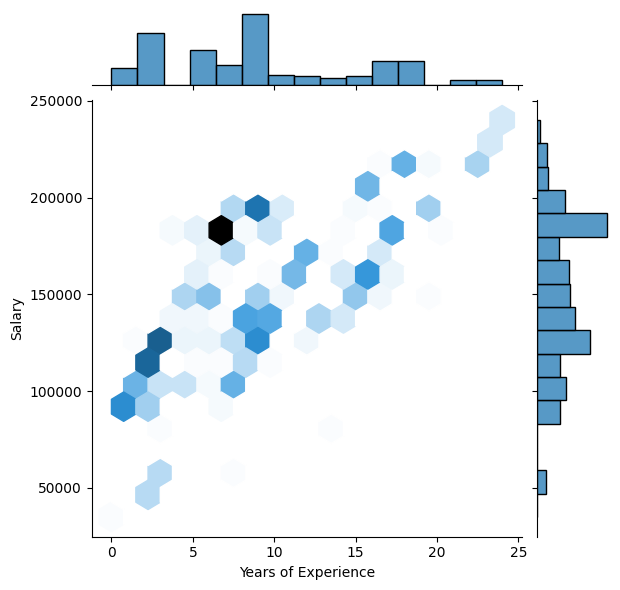

In [ ]:
sns.jointplot(data = df_data, x = 'Years of Experience', y='Salary',  kind = 'hex');

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\929589858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_6940\929589858.py:2: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))


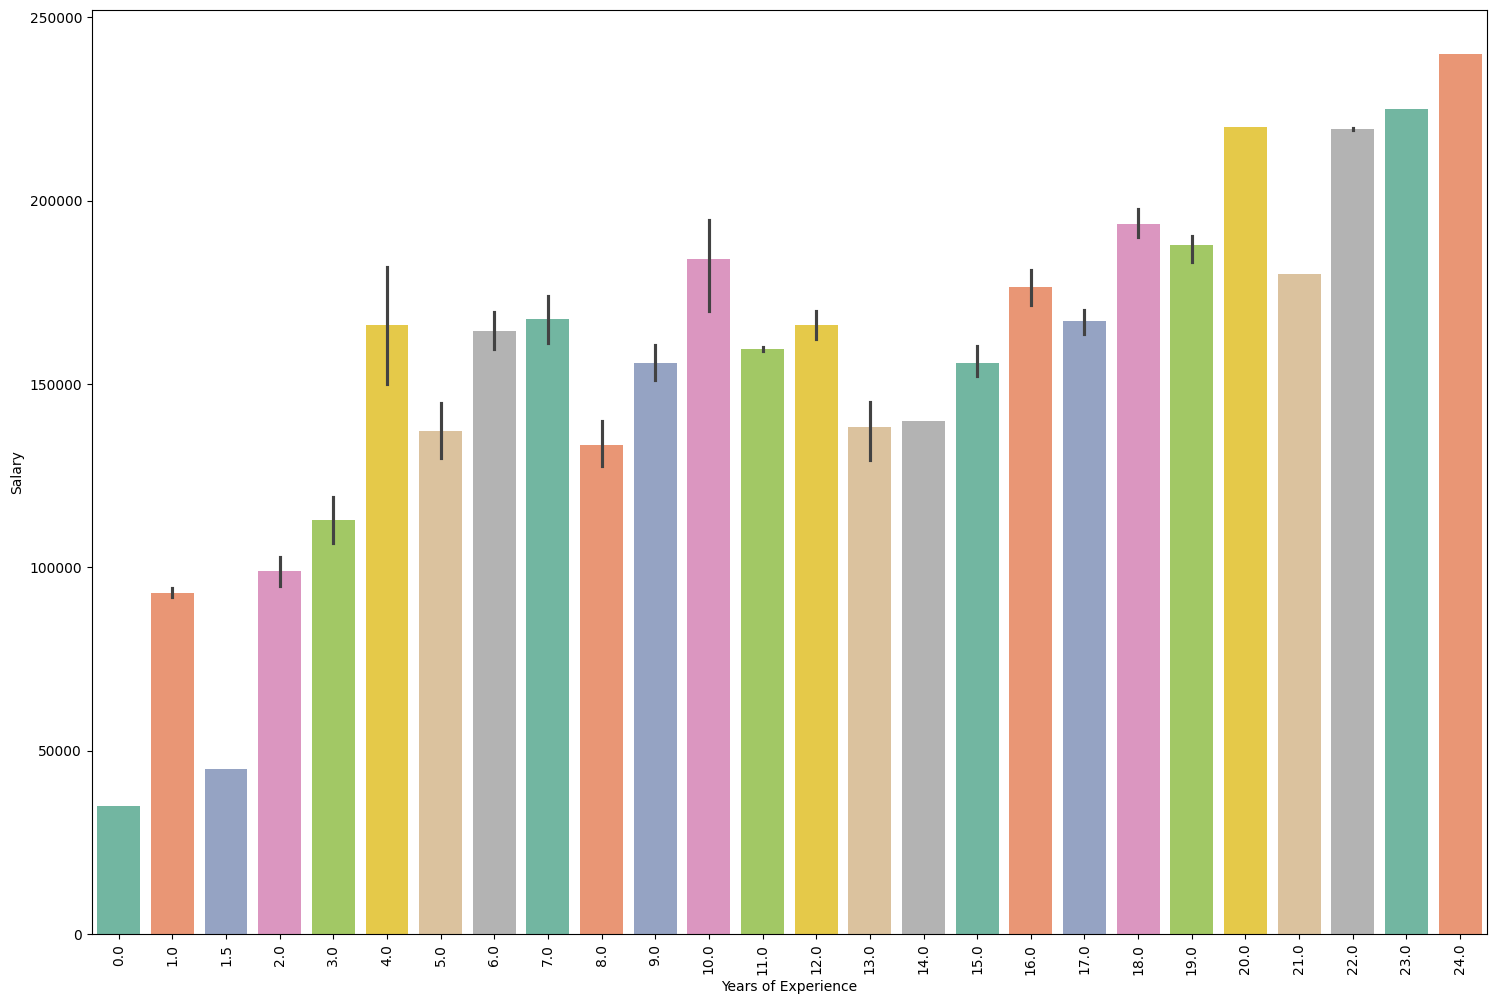

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\281820600.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))


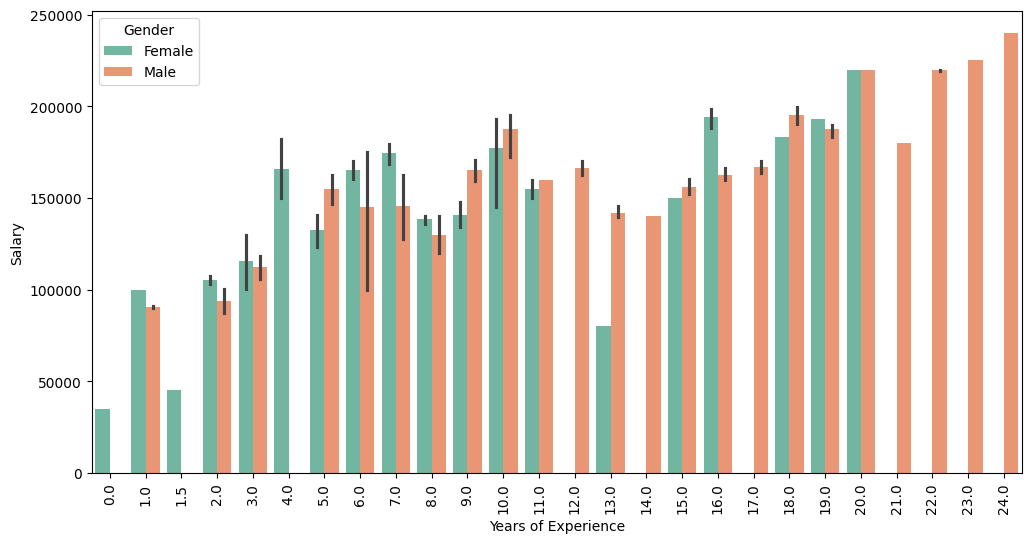

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

## HIPOTESIS 6: ##
¿Dentro del campo de data, hay diferencias entre la cantidad de hombres y mujeres?

## HIPOTESIS 7: ##
 ¿Dentro del campo de data, hay diferencias entre los salarios de hombre y mujeres?
 Relacion entre puestos de trabajo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.



In [321]:
df3 = pd.DataFrame(df_data.groupby(['Job Title', 'Gender'])['Salary'].mean().round(2))
df3

NameError: name 'df_data' is not defined

In [320]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Job Title',y= 'Salary', hue='Gender',data=df3)
plt.xticks(rotation=90)
plt.show()

NameError: name 'df3' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
df4 = pd.DataFrame(df_data.groupby(['Job Title','Gender'])['Gender'].count().round(2))
df4

Gender
Job Title                Gender        
Chief Data Officer       Male         1
Data Entry Clerk         Female       1
Director of Data Science Female      26
                         Male        31
Junior Data Analyst      Female      86
                         Male       159
Junior Data Scientist    Female      18
                         Male        12
Senior Data Analyst      Female      43
                         Male       103
Senior Data Engineer     Female       2
                         Male         2
Senior Data Scientist    Female     189
                         Male       296

In [ ]:
df4_unstacked = df4.unstack(level='Gender')
df4_unstacked.columns = df4_unstacked.columns.droplevel()
df4_unstacked


Gender,Female,Male
Job Title,,
Chief Data Officer,NaN,1.0
Data Entry Clerk,1.0,NaN
Director of Data Science,26.0,31.0
Junior Data Analyst,86.0,159.0
Junior Data Scientist,18.0,12.0
Senior Data Analyst,43.0,103.0
Senior Data Engineer,2.0,2.0
Senior Data Scientist,189.0,296.0


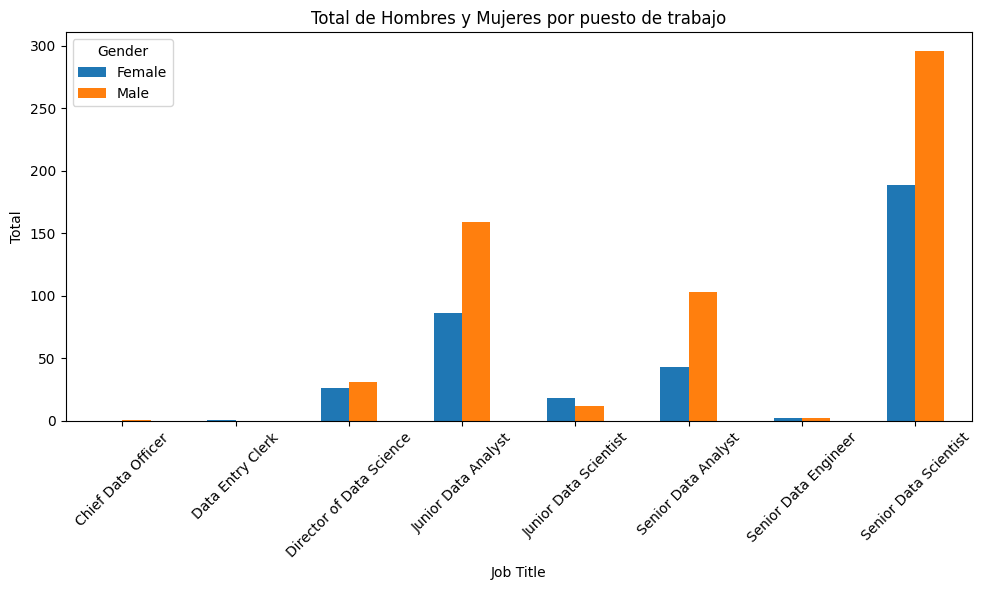

In [ ]:
df4_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Job Title')
plt.ylabel('Total')
plt.title('Total de Hombres y Mujeres por puesto de trabajo')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

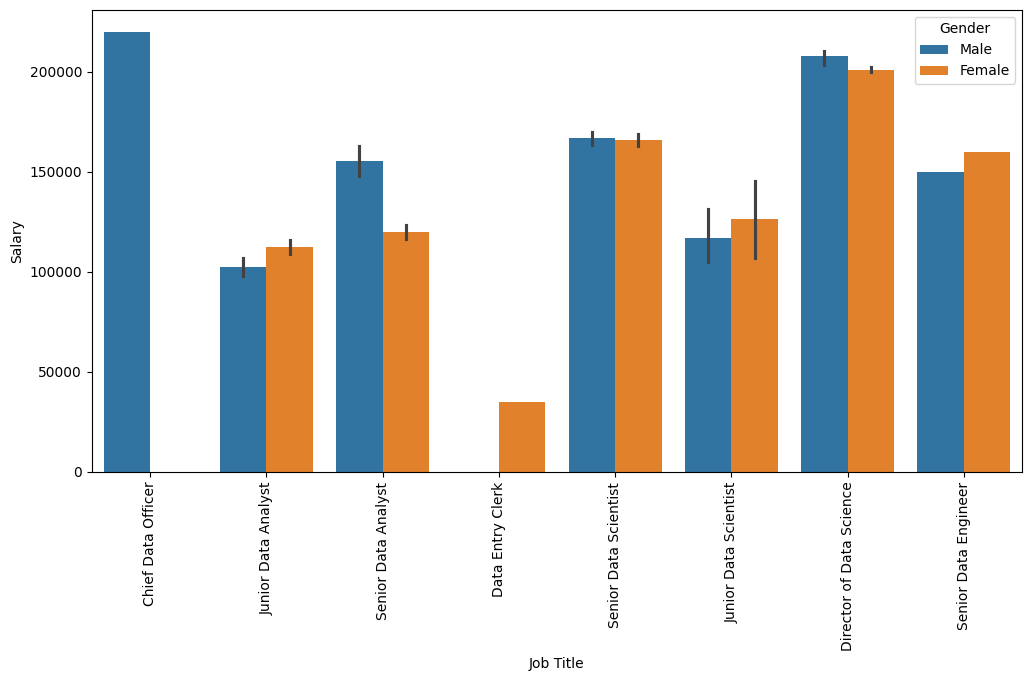

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Job Title', y='Salary', hue='Gender',data=df_data)
plt.xticks(rotation=90)
plt.show()

## HIPOTESIS 8: #
Dentro del campo de data, qué trabajo tiene mayor ratio de trabajo remoto?

## HIPOTESIS 9: ##
Dentro del campo de data, ¿quién tiene mayor salario de entrada?

## HIPOTESIS 10: ##

Dentro del campo de data, cuál es la media de edad de los trabajadores Junior? Hay diferencia entre la media de edad entre hombres y mujeres junior?

### ANALISIS UNIVARIANTE - SALARY ###


In [318]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


<Axes: xlabel='Salary', ylabel='Density'>

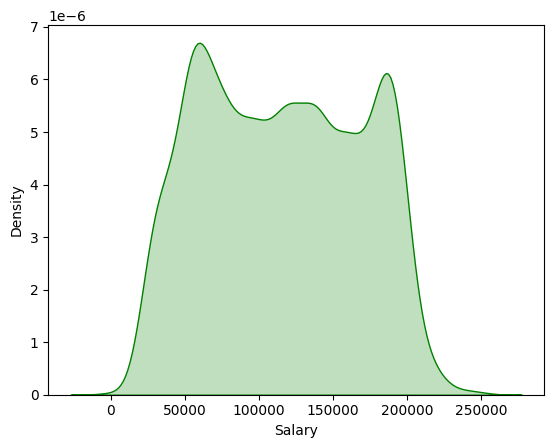

In [319]:
sns.kdeplot(data=df2, x='Salary',fill=True,color='green')

conocer como se distribuye

In [ ]:
from scipy.stats import shapiro
# Datos de ejemplo
datos = [23, 25, 27, 28, 30, 32, 33, 35, 35, 36]
# Prueba de Shapiro-Wilk
estadistico, p_valor = shapiro(datos)
print(f'Estadístico de Shapiro-Wilk: {estadistico}\nP-Valor: {p_valor}')
# Interpretación del resultado
if p_valor > 0.05:
    print('No hay evidencia para rechazar la hipótesis nula. Los datos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')


(0.0, 0.5)

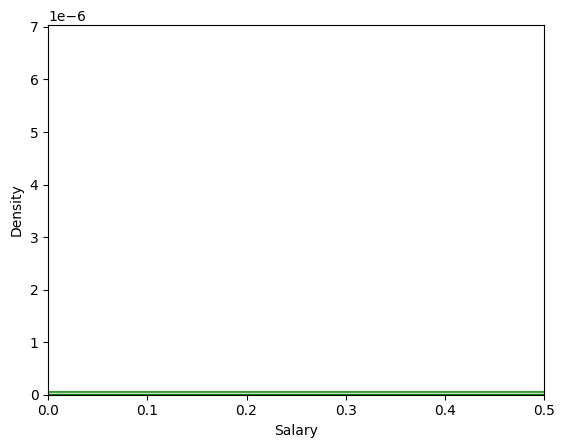

In [317]:
from scipy.stats import kurtosis, skew

media = df2['Salary'].mean()
median= df2['Salary'].median()
mode = df['Salary'].mode()


variance= df2['Salary'].var()
desv_std = df2['Salary'].std()  
kurtosis_valor = kurtosis(df2['Salary'])
simetria_valor = skew(df2['Salary'])


sns.kdeplot(data=df2, x='Salary',fill=True,color='green')

plt.axvline(media, color='red', linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color='blue', linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='brown', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')
plt.xlim(0,0.5)

C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1979777247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');
C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1979777247.py:3: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');


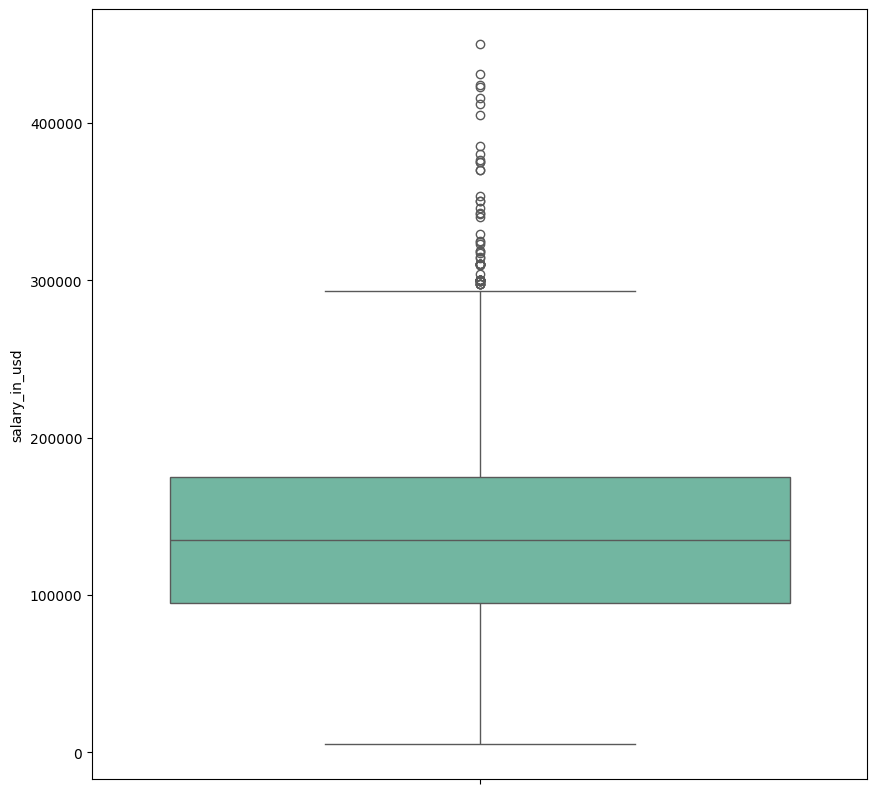

In [141]:
plt.figure(figsize=(10,10))

sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');

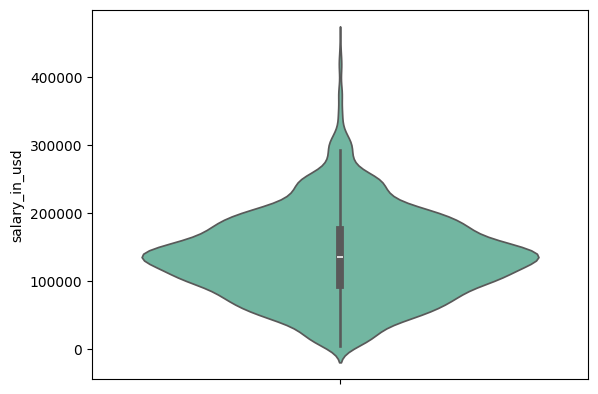

In [71]:
sns.violinplot(df['salary_in_usd'], palette=sns.color_palette('Set2'), inner = 'box');

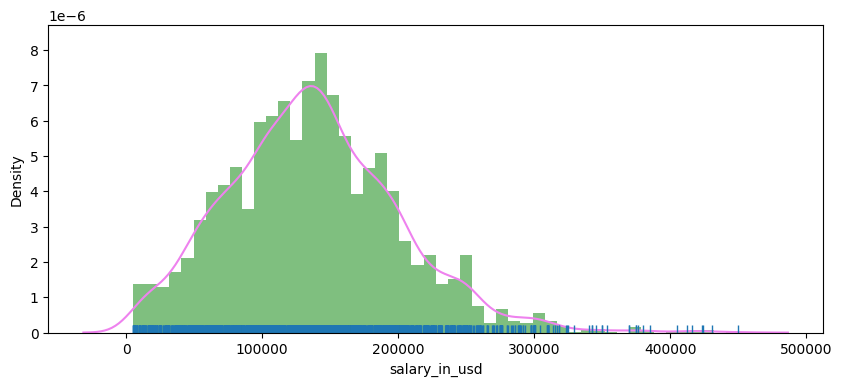

In [80]:
plt.figure(figsize=(10,4))
sns.distplot(df['salary_in_usd'],
            kde_kws={'color':'violet'},#color de la linea
            hist_kws={ 'linewidth':3,
                     'alpha':0.5, 'color':'g'},
            bins = 50,
            rug=True);

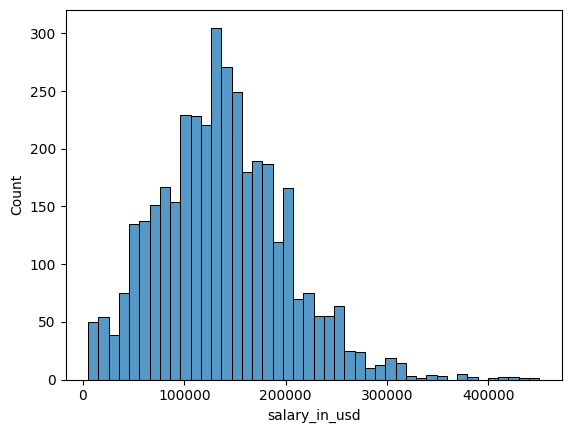

In [76]:
sns.histplot(df['salary_in_usd'], palette=sns.color_palette('Set2'));

## Analisis ANTERIOR



### Analsis Univariante


- teorema limite central  (med, mod, median)
- muestra media moda y median y sus distribuciones
- distribución por especie
- conteo de valores por especies y % del total
- distrib sexos
- graficar desv estandar y varienza
distribuciones rango, max, min

**VARIABLES CUALITATIVAS**

Employment level:

In [16]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Siglas experience level:

EN, which refers to Entry-level / Junior.

MI, which refers to Mid-level / Intermediate.

SE, which refers to Senior-level / Expert.

EX, which refers to Executive-level / Director.

In [17]:
df.experience_level.mode()

0    SE
Name: experience_level, dtype: object

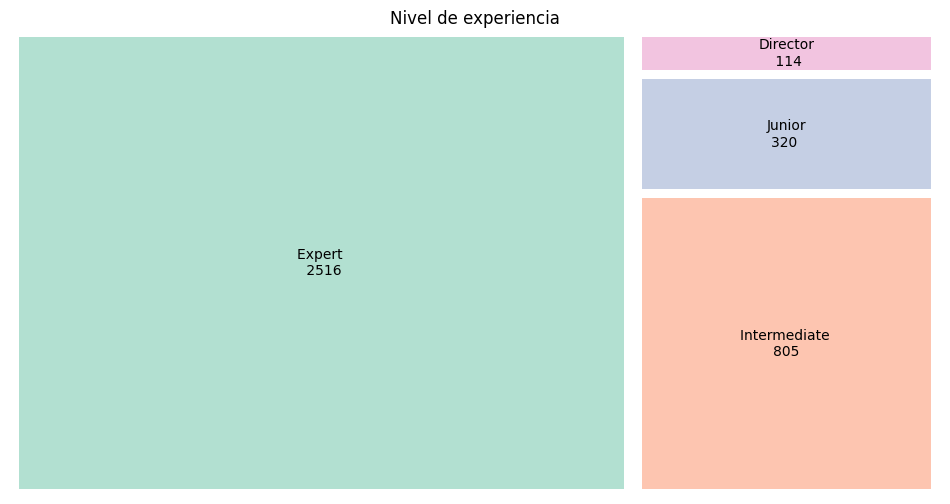

In [18]:
plt.figure(figsize=(12,6))
plt.axis('off')

exp_level_plot = squarify.plot(sizes = df['experience_level'].value_counts(), label=['Expert \n 2516','Intermediate \n805', 'Junior\n320 ', 'Director\n 114'], 
              alpha = 0.5, pad = True, color= sns.color_palette('Set2'))
exp_level_plot.set_title('Nivel de experiencia');

In [19]:
df2 = df.copy()

In [20]:
df2['employment_type'] = df2['employment_type'].replace('PT','Part-Time')
df2['employment_type'] = df2['employment_type'].replace('FT','Full-Time')
df2['employment_type'] = df2['employment_type'].replace('CT','Contract')
df2['employment_type'] = df2['employment_type'].replace('FL','Freelance')

In [21]:
labels = df2['employment_type'].value_counts(normalize=True).to_dict()
labels

{'Full-Time': 0.9901464713715047,
 'Part-Time': 0.004527296937416778,
 'Contract': 0.002663115845539281,
 'Freelance': 0.002663115845539281}

<Figure size 1200x600 with 0 Axes>

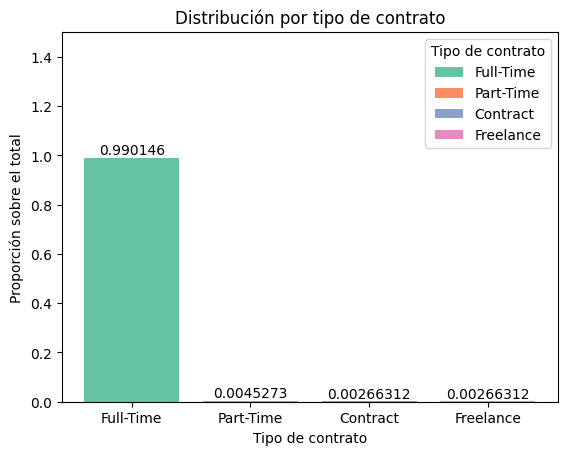

In [22]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
bar_labels = labels.keys()
employ_type_plot = plt.bar(labels.keys(), labels.values(), label = labels.keys(),color= sns.color_palette('Set2'));

ax.set_title('Distribución por tipo de contrato')
ax.legend(title='Tipo de contrato')
ax.set(ylabel='Proporción sobre el total', ylim=(0, 1.5))
ax.set(xlabel='Tipo de contrato')
bar_container = ax.bar(labels.keys(), labels.values(), color= sns.color_palette('Set2'))
ax.bar_label(bar_container,)
plt.show();

In [90]:
ratio = pd.DataFrame(df.groupby('job_title')['remote_ratio'].mean().round(2))
ratio.sort_values(by='remote_ratio', inplace=True, ascending=False)
ratio = ratio[:15]
ratio

,remote_ratio
job_title,
Staff Data Scientist,100.00
Principal Data Engineer,100.00
MLOps Engineer,100.00
Manager Data Management,100.00
Marketing Data Analyst,100.00
Compliance Data Analyst,100.00
Cloud Database Engineer,100.00
Principal Data Analyst,100.00
Principal Data Architect,100.00


<Axes: ylabel='job_title'>

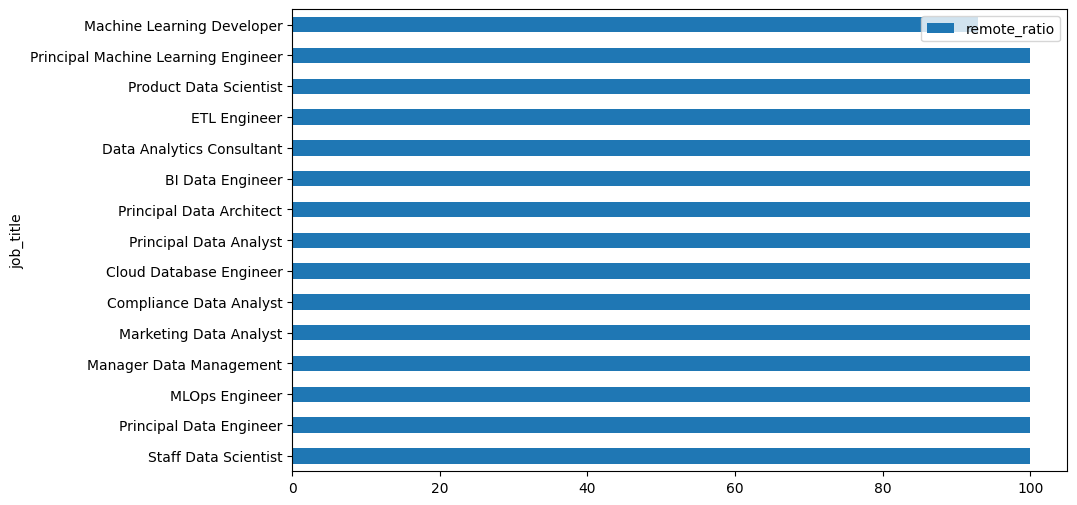

In [105]:
ratio.plot(kind='barh', stacked=False, figsize=(10, 6))

In [110]:
ratio_trans = ratio.transpose()

C:\Users\laura\AppData\Local\Temp\ipykernel_7276\1643457176.py:2: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))


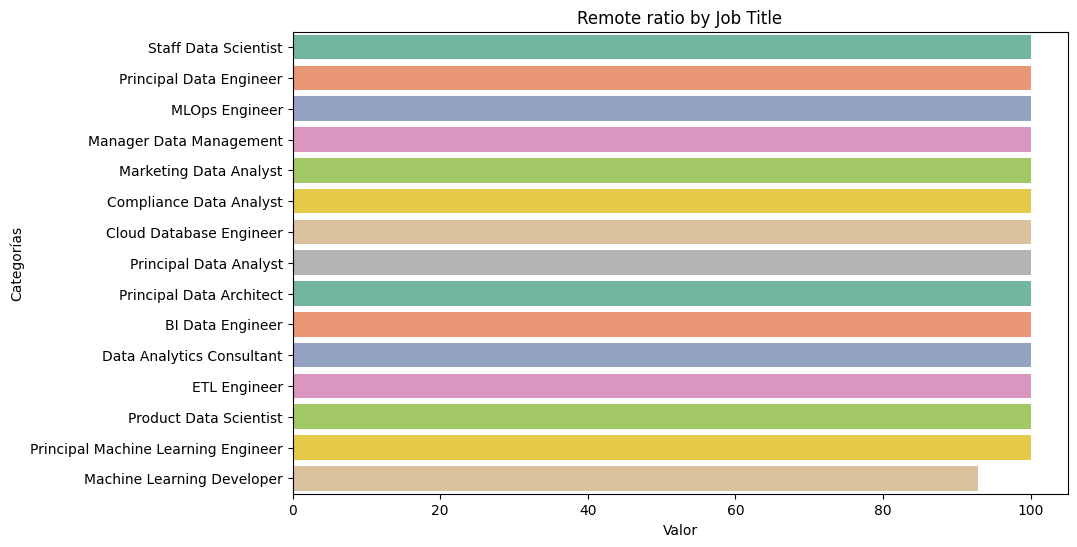

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ratio_trans, orient='h', palette=sns.color_palette('Set2'))
plt.xlabel('Valor')
plt.ylabel('Categorías')
plt.title('Remote ratio by Job Title')
plt.show()


In [91]:
top_salary_job = pd.DataFrame(df.groupby('job_title')['salary'].mean().round(2))
top_salary_job.sort_values(by='salary', inplace=True, ascending=False)
top_salary_job = top_salary_job[:15]
top_salary_job

,salary
job_title,
Head of Machine Learning,6000000.00
Principal Data Architect,3000000.00
Lead Machine Learning Engineer,2548666.67
Lead Data Scientist,928485.33
Data Analytics Lead,922500.00
BI Data Analyst,836644.80
Head of Data Science,703729.44
Lead Data Analyst,655000.00
ML Engineer,609997.91


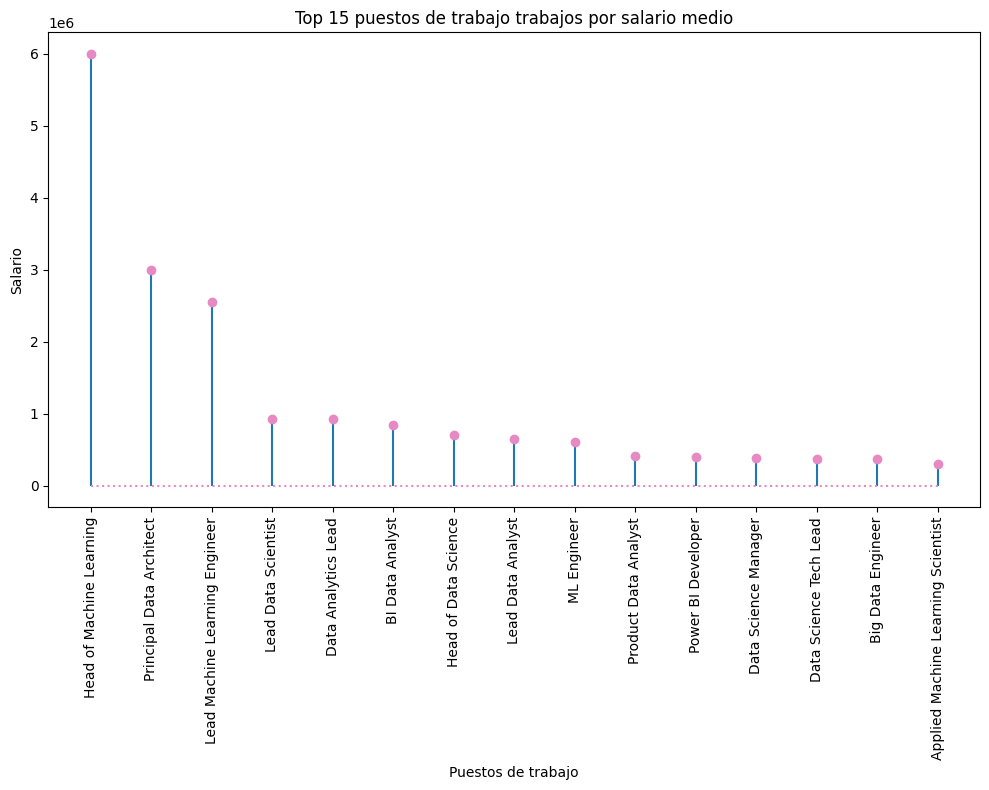

In [138]:
plt.figure(figsize=(10, 8))
plt.stem(top_salary_job.index, top_salary_job['salary'], markerfmt='o', linefmt='-', basefmt=':')

colors = sns.color_palette('Set2')
plt.setp(plt.gca().get_lines(), color=colors[3])

plt.xticks(rotation=90)
plt.xlabel('Puestos de trabajo')
plt.ylabel('Salario')
plt.title('Top 15 puestos de trabajo trabajos por salario medio')
plt.tight_layout()
plt.show()

In [73]:
jobs = df['job_title'].value_counts()[:15].to_dict()


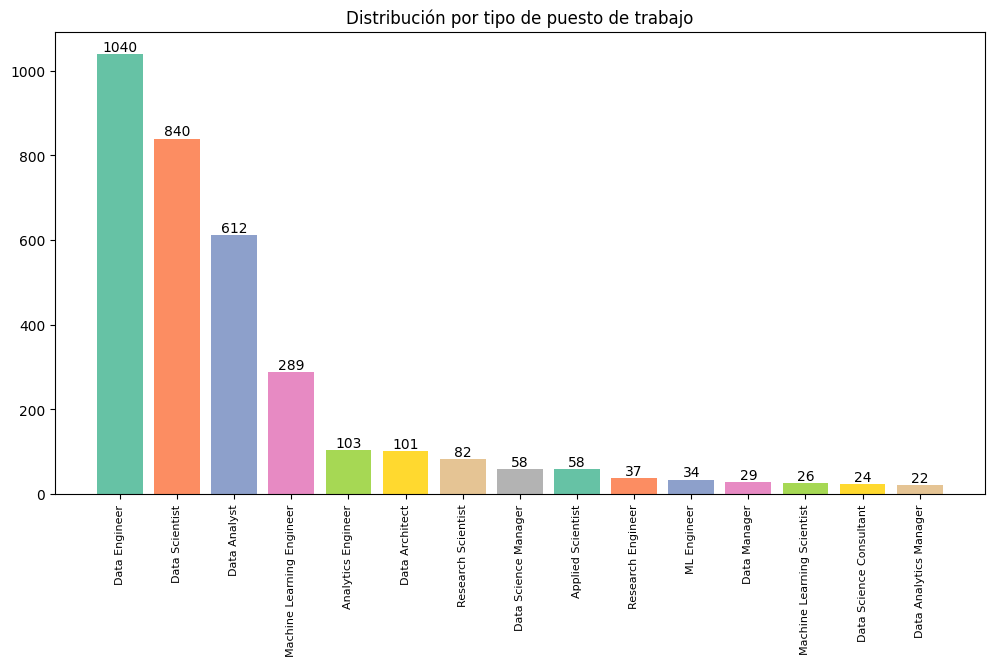

In [76]:
plt.figure(figsize=(12,6))
employ_name = plt.bar(jobs.keys(), jobs.values(), label = jobs.keys(),color= sns.color_palette('Set2'));

plt.title('Distribución por tipo de puesto de trabajo')
plt.xticks(rotation= 90, fontsize= 8)
bar_container = plt.bar(jobs.keys(), jobs.values(), color= sns.color_palette('Set2'))
plt.bar_label(bar_container,)

plt.show();



In [26]:
emply_res = pd.DataFrame(df['employee_residence'].value_counts()[:20])
emply_res.reset_index(inplace=True)

In [27]:
country_names = {
                    'US': 'Estados Unidos',
                    'GB': 'Reino Unido',
                    'CA': 'Canadá',
                    'ES': 'España',
                    'IN': 'India',
                    'DE': 'Alemania',
                    'FR': 'Francia',
                    'PT': 'Portugal',
                    'BR': 'Brasil',
                    'GR': 'Grecia',
                    'NL': 'Países Bajos',
                    'AU': 'Australia',
                    'MX': 'México',
                    'IT': 'Italia',
                    'PK': 'Pakistán',
                    'JP': 'Japón',
                    'IE': 'Irlanda',
                    'NG': 'Nigeria',
                    'AT': 'Austria',
                    'AR': 'Argentina'}

C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))


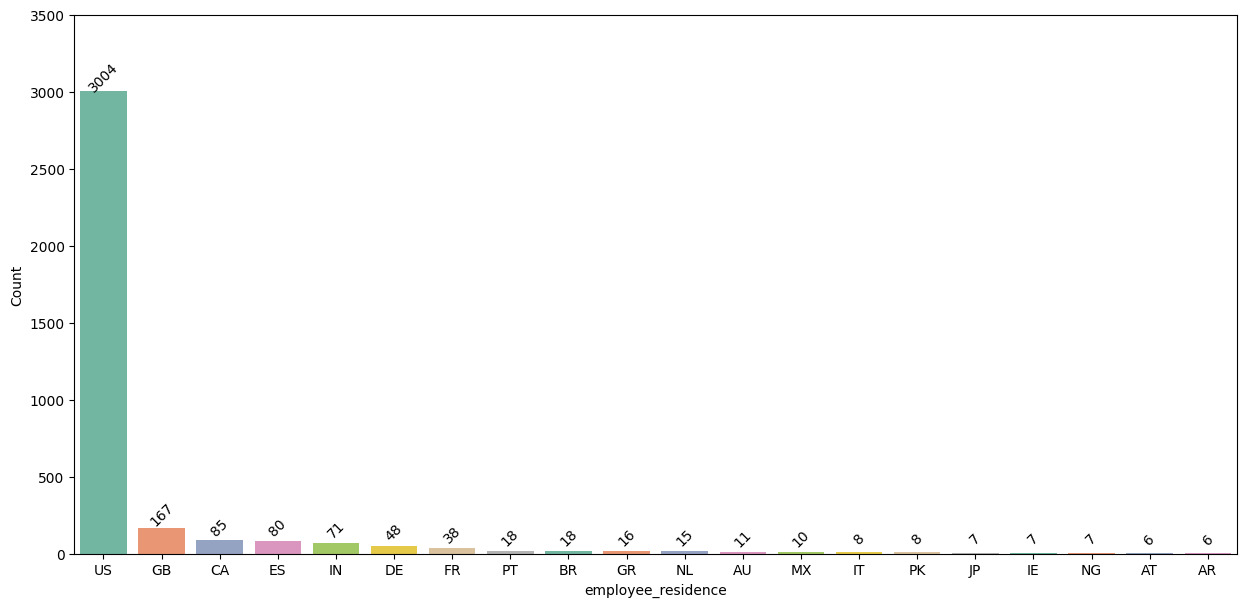

In [28]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [30]:
comp_loc = pd.DataFrame(df['company_location'].value_counts()[:20])


C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))


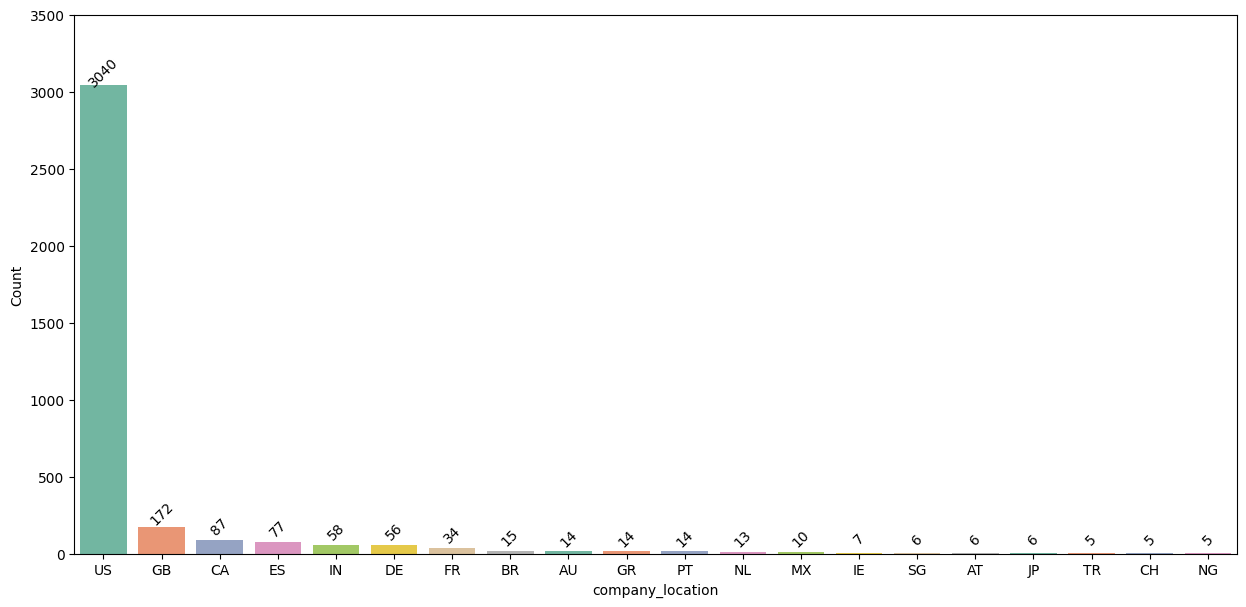

In [31]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
sizes =df['company_size'].value_counts()
sizes

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))


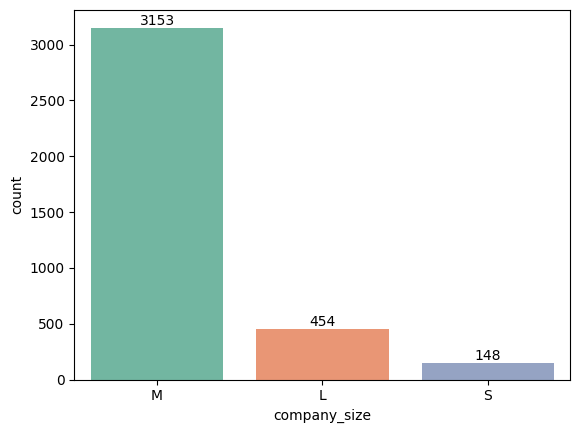

In [ ]:
plt.figure()
ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))

for i in ax.containers:
    ax.bar_label(i,)

 sns.barplot method will return a list of sub methods. use containers method to access  the text label of each bar by passing it  through the ax.bar_label function use for loop to iterate through the list of labels and assign each bar to a different  label.

In [117]:
df.select_dtypes('object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ESP,ESP,L
1,MI,CT,ML Engineer,USA,USA,S
2,MI,CT,ML Engineer,USA,USA,S
3,SE,FT,Data Scientist,CAN,CAN,M
4,SE,FT,Data Scientist,CAN,CAN,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USA,USA,L
3751,MI,FT,Principal Data Scientist,USA,USA,L
3752,EN,FT,Data Scientist,USA,USA,S
3753,EN,CT,Business Data Analyst,USA,USA,L


In [114]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [116]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country

In [119]:
residence = df['employee_residence'].value_counts()
px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.Plotly3,
                    title = 'Employee Loaction On Map')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'locations=%{location}<br>color=%{z}<extra></extra>',
              'locations': array(['USA', 'GBR', 'CAN', 'ESP', 'IND', 'DEU', 'FRA', 'PRT', 'BRA', 'GRC',
                                  'NLD', 'AUS', 'MEX', 'ITA', 'PAK', 'JPN', 'IRL', 'NGA', 'AUT', 'ARG',
                                  'POL', 'PRI', 'TUR', 'BEL', 'SGP', 'RUS', 'LVA', 'UKR', 'COL', 'CHE',
                                  'SVN', 'BOL', 'DNK', 'HRV', 'HUN', 'ROU', 'THA', 'ARE', 'VNM', 'HKG',
                                  'UZB', 'PHL', 'CAF', 'CHL', 'FIN', 'CZE', 'SWE', 'ASM', 'LTU', 'GHA',
                                  'KEN', 'DZA', 'NZL', 'JEY', 'MYS', 'MDA', 'IRQ', 'BGR', 'LUX', 'SRB',
                                  'HND', 'EST', 'TUN', 'CRI', 'IDN', 'EGY', 'DOM', 'CHN', 'SVK', 'IRN',
                                  'MAR', 'ISR', 'MKD', 'BIH', 'ARM', 'CYP', 'KWT', 'MLT'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([3004,  167,   85,   80,   71,   48,   38,   18,   18,   16,   15,   11,
                            10,    8,    8,    7,    7,    7,    6,    6,    6,    5,    5,    5,
                             5,    4,    4,    4,    4,    4,    4,    3,    3,    3,    3,    3,
                             3,    3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
                             2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0508b8'],
                                            [0.08333333333333333, '#1910d8'],
                                            [0.16666666666666666, '#3c19f0'],
                                            [0.25, '#6b1cfb'], [0.3333333333333333,
                                            '#981cfd'], [0.4166666666666667,
                                            '#bf1cfd'], [0.5, '#dd2bfd'],
                                            [0.5833333333333334, '#f246fe'],
                                            [0.6666666666666666, '#fc67fd'], [0.75,
                                            '#fe88fc'], [0.8333333333333334,
                                            '#fea5fd'], [0.9166666666666666,
                                            '#febefe'], [1.0, '#fec3fe']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Employee Loaction On Map'}}
})

**VARIABLES CUANTITATIVAS**

In [33]:
df.select_dtypes(exclude='object')

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


### AnalIsis Bivariante

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ESP,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USA,100,US,S
2,2023,MI,CT,ML Engineer,25500,USA,100,US,S
3,2023,SE,FT,Data Scientist,175000,CAN,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CAN,100,CA,M


In [93]:
loc= df['company_location'].value_counts()
top_15= loc[:20]
resid= df['employee_residence'].value_counts()
top_res= resid[:20]

In [106]:
data1 = pd.DataFrame((resid, top_15))
data1

,count,count
USA,3004.0,NaN
GBR,167.0,NaN
CAN,85.0,NaN
ESP,80.0,NaN
IND,71.0,NaN
...,...,...
AT,NaN,6.0
JP,NaN,6.0
TR,NaN,5.0
CH,NaN,5.0


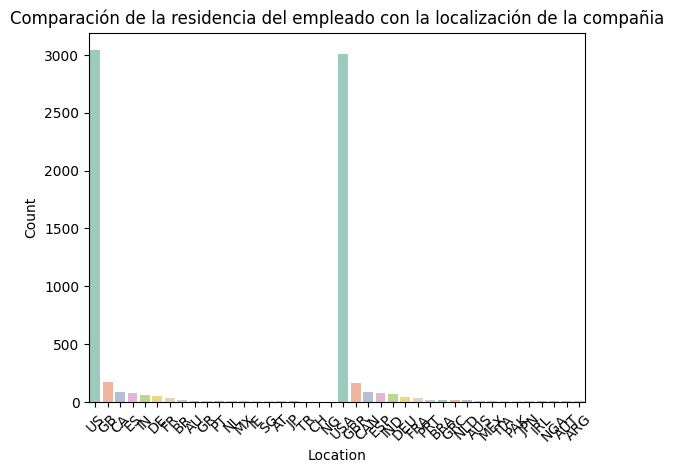

In [107]:

plt.figure()

sns.barplot(x=top_15.index, y=top_15.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Employee Residence')
sns.barplot(x=top_res.index, y=top_res.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Company Location')
# COMBIAR AMBOS

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparación de la residencia del empleado con la localización de la compañia')


plt.xticks(rotation=45)

plt.show()

In [34]:
group = pd.DataFrame(df.groupby(['experience_level','company_size']).size())
group

0
experience_level company_size      
EN               L              100
                 M              171
                 S               49
EX               L               13
                 M               95
                 S                6
MI               L              134
                 M              621
                 S               50
SE               L              207
                 M             2266
                 S               43

In [33]:
plt.figure()

sns.countplot(x=exp_size.index, data=exp_size, hue = group['company_size'])

NameError: name 'exp_size' is not defined

<Figure size 640x480 with 0 Axes>

### Analsis Multivariante

In [36]:
df.select_dtypes(exclude=['object']).corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000
